In [16]:
#library(wesanderson)
#library(lmerTest) # Дурак!
library(ggplot2)
library(lme4)

ERROR: Error in library(Hmisc): there is no package called ‘Hmisc’


In [22]:
#install.packages("lmerTest") # Дурак!
#install.packages("Hmisc")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository http://cran.stat.sfu.ca/src/contrib:
  internet routines cannot be loaded”Warning message:
“package ‘lmerTest’ is not available (for R version 3.5.1)”Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository http://cran.stat.sfu.ca/src/contrib:
  internet routines cannot be loaded”Warning message:
“package ‘Hmisc’ is not available (for R version 3.5.1)”

In [2]:
data<-read.csv(file="http://dotov.synology.me/wordpress/mada_gc3.csv",header=TRUE)

Warning message in file(file, "rt"):
“unable to load shared object '/opt/conda/lib/R/modules//internet.so':
  /opt/conda/lib/R/modules//internet.so: undefined symbol: curl_multi_wait”

ERROR: Error in file(file, "rt"): internet routines cannot be loaded


In [4]:
data<-read.csv(file="mada_gc3.csv",header=TRUE)
summary(data)

      pair             gc             condition       trial     
 Min.   : 1.00   Min.   :0.001360   Min.   :1.0   Min.   :1.00  
 1st Qu.: 3.75   1st Qu.:0.005867   1st Qu.:1.0   1st Qu.:2.75  
 Median : 6.50   Median :0.008477   Median :1.5   Median :4.50  
 Mean   : 6.50   Mean   :0.009668   Mean   :1.5   Mean   :4.50  
 3rd Qu.: 9.25   3rd Qu.:0.012249   3rd Qu.:2.0   3rd Qu.:6.25  
 Max.   :12.00   Max.   :0.030522   Max.   :2.0   Max.   :8.00  
 trial_collapsed     piece    
 Min.   :1.00    Min.   :1.0  
 1st Qu.:1.75    1st Qu.:1.0  
 Median :2.50    Median :1.5  
 Mean   :2.50    Mean   :1.5  
 3rd Qu.:3.25    3rd Qu.:2.0  
 Max.   :4.00    Max.   :2.0  

In [11]:
data$pair<-factor(data$pair)
data$condition<-factor(data$condition)
data$piece<-factor(data$piece)

In [13]:
head(data)

pair,gc,condition,trial,trial_collapsed,piece
1,0.009393300,1,1,1,1
2,0.009160292,1,1,1,1
3,0.008034978,1,1,1,1
4,0.011879676,1,1,1,1
5,0.008121850,1,1,1,1
6,0.009854801,1,1,1,1


In [14]:
df

,pair,gc,condition,trial,trial_collapsed,piece
97,1,0.017143587,2,1,1,2
98,2,0.013690696,2,1,1,2
99,3,0.014504756,2,1,1,2
100,4,0.008413840,2,1,1,2
101,5,0.005306286,2,1,1,2
102,6,0.016125070,2,1,1,2
103,7,0.019364587,2,1,1,2
104,8,0.005701306,2,1,1,2
105,9,0.023735141,2,1,1,2
106,10,0.016835685,2,1,1,2


In [23]:
g <- vector("list",4)
for (p in seq(1,2)) {
  for (c in seq(1,2)) {
    df<-data[(data$piece==p) & (data$condition==c),]
    #colors<-wes_palette("FantasticFox1",length(unique(df$pair)),type=("continuous"))
    g[[p+2*(c-1)]] <- ggplot(df) +
      geom_jitter(aes(x=trial, y=gc, colour=pair), size=2, alpha=.8, height=.00, width=.0) +
      geom_line(aes(x=trial, y=gc, colour=pair), size=1.2, alpha=.5) +
      #scale_colour_manual(values=colors) +
      theme(legend.position="top",legend.title=element_blank()) +
      stat_summary(aes(x=trial,y=gc), fun='mean', geom='line', size=1.2, alpha=.7) +
      #stat_summary(aes(x=trial,y=gc), geom="ribbon", fun.data=mean_cl_boot, alpha=.5) +
      stat_summary(aes(x=trial,y=gc), geom="ribbon", fun.data=mean_se, alpha=.5) +
      theme_classic() +
      labs(y = 'mvGC') +
      labs(x = "Lag")
      #print(g)
  }
}

Warning message:
“Ignoring unknown parameters: fun”Warning message:
“Ignoring unknown parameters: fun”Warning message:
“Ignoring unknown parameters: fun”Warning message:
“Ignoring unknown parameters: fun”

[[1]]


No summary function supplied, defaulting to `mean_se()



[[1]]


No summary function supplied, defaulting to `mean_se()


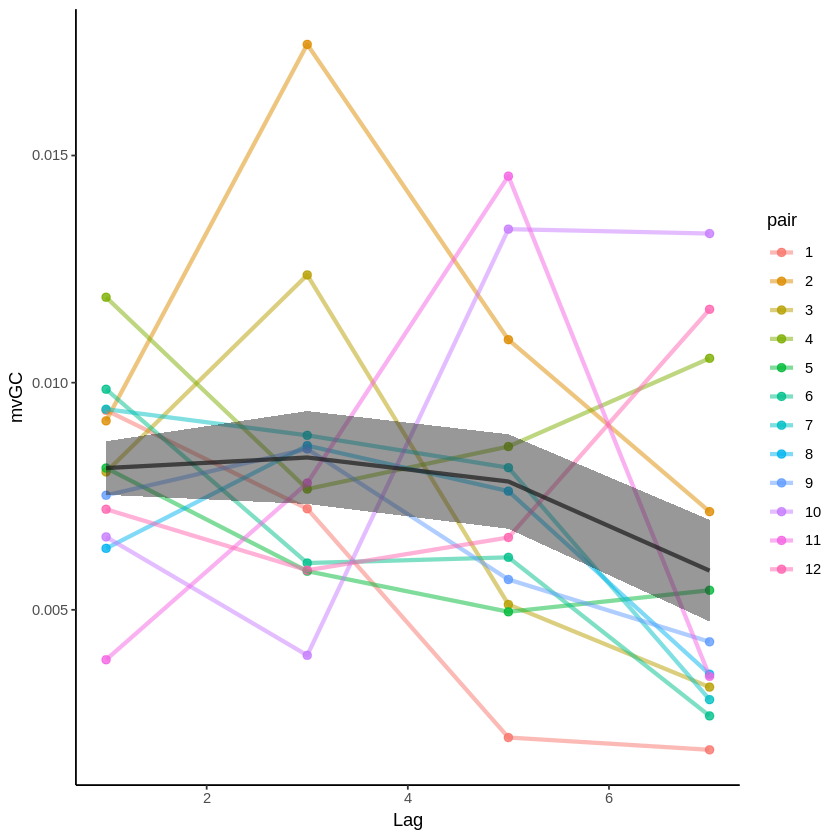


[[1]]


No summary function supplied, defaulting to `mean_se()


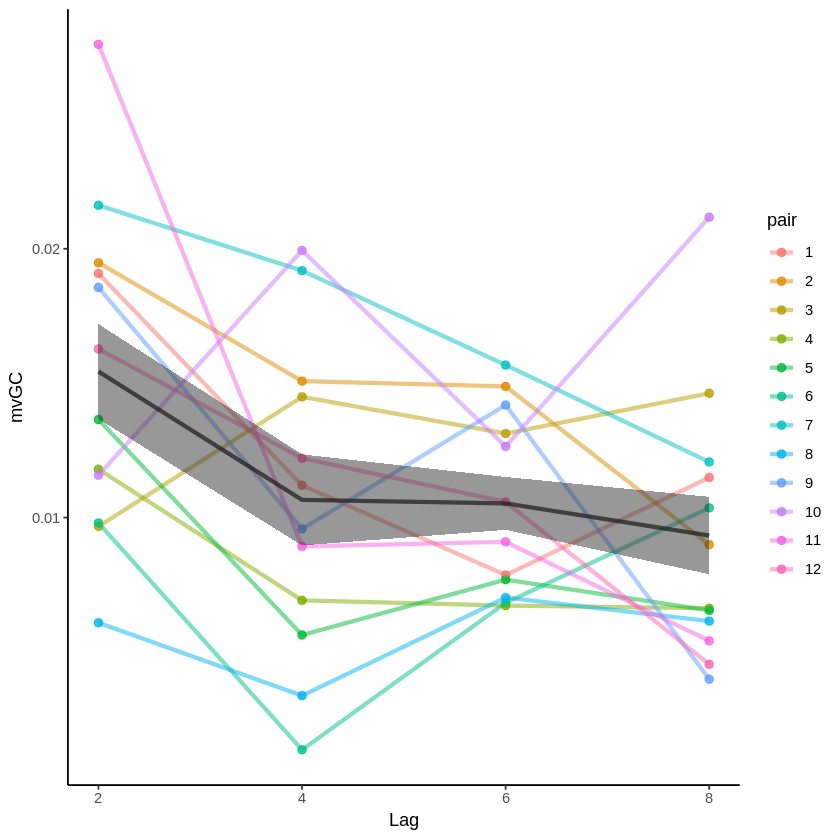


[[1]]


No summary function supplied, defaulting to `mean_se()


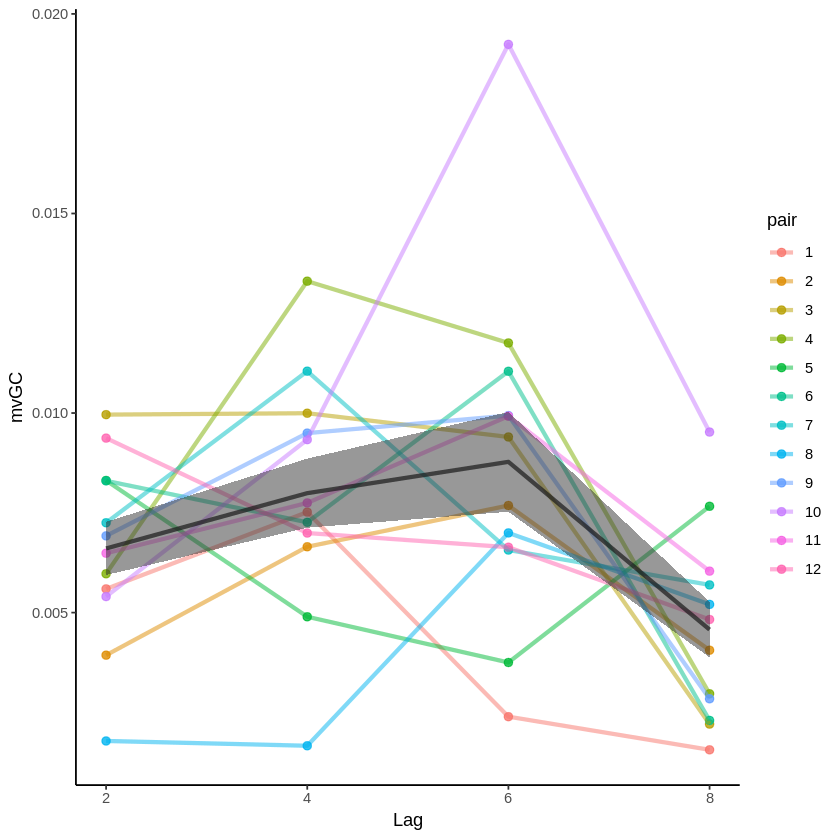

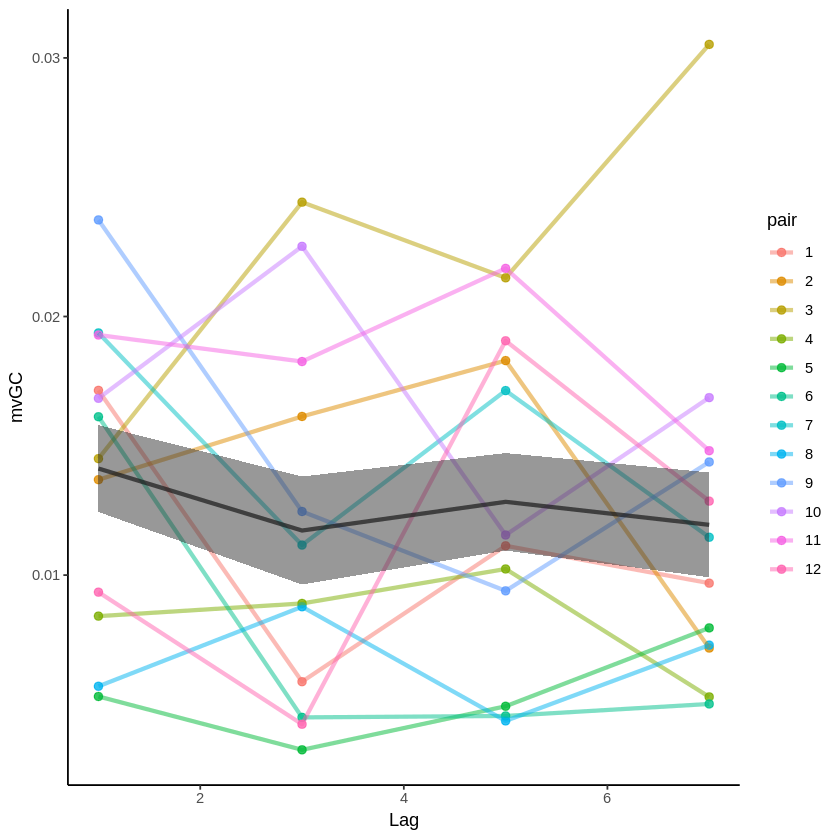

In [26]:
print(g[1])
print(g[2])
print(g[3])
print(g[4])

In [42]:
m00=lmer(gc ~ 1 + (1|pair),data=data,REML=0)
m01=lmer(gc ~ 1 + trial + (1|pair),data=data,REML=0)
m02=lmer(gc ~ 1 + trial + (1+trial|pair),data=data,REML=0)
m03=lmer(gc ~ 1 + trial + piece + (1+trial|pair),data=data,REML=0)
m04=lmer(gc ~ 1 + trial+condition + piece + (1+trial|pair),data=data,REML=0)
m05=lmer(gc ~ 1 + trial*condition + piece + (1+trial|pair),data=data,REML=0)
m06=lmer(gc ~ 1 + trial*condition*piece + (1+trial|pair),data=data,REML=0)

In [28]:
anova(m00,m01,m02,m03,m04,m05,m06)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m00,3,-1465.201,-1455.428,735.6004,-1471.201,NA,NA,NA
m01,4,-1472.406,-1459.376,740.2032,-1480.406,9.2054828,1,2.412913e-03
m02,6,-1468.532,-1448.987,740.2658,-1480.532,0.1253376,2,9.392545e-01
m03,7,-1520.464,-1497.661,767.2319,-1534.464,53.9320811,1,2.075412e-13
m04,8,-1518.725,-1492.665,767.3623,-1534.725,0.2609116,1,6.094946e-01
m05,9,-1518.674,-1489.357,768.3372,-1536.674,1.9497042,1,1.626187e-01
m06,12,-1515.288,-1476.198,769.6439,-1539.288,2.6134652,3,4.551338e-01


In [29]:
summary(m03)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: gc ~ 1 + trial + piece + (1 + trial | pair)
   Data: data

     AIC      BIC   logLik deviance df.resid 
 -1520.5  -1497.7    767.2  -1534.5      185 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1134 -0.6302 -0.1394  0.6017  4.0021 

Random effects:
 Groups   Name        Variance  Std.Dev.  Corr 
 pair     (Intercept) 5.393e-06 0.0023223      
          trial       8.877e-08 0.0002979 -0.39
 Residual             1.744e-05 0.0041764      
Number of obs: 192, groups:  pair, 12

Fixed effects:
              Estimate Std. Error t value
(Intercept)  0.0094026  0.0009907   9.491
trial       -0.0004752  0.0001572  -3.024
piece2       0.0048071  0.0006028   7.975

Correlation of Fixed Effects:
       (Intr) trial 
trial  -0.644       
piece2 -0.304  0.000

In [30]:
anova(m03)

,Df,Sum Sq,Mean Sq,F value
trial,1,0.0001594612,0.0001594612,9.142405
piece,1,0.0011092122,0.0011092122,63.594562


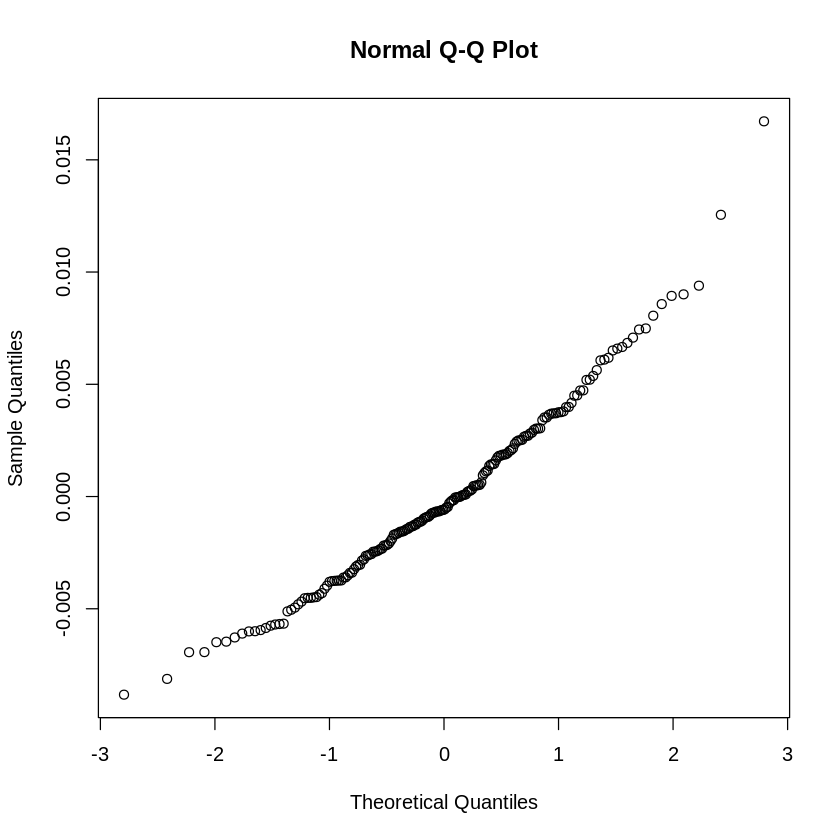

In [31]:
qqnorm(data$gc-fitted(m03))

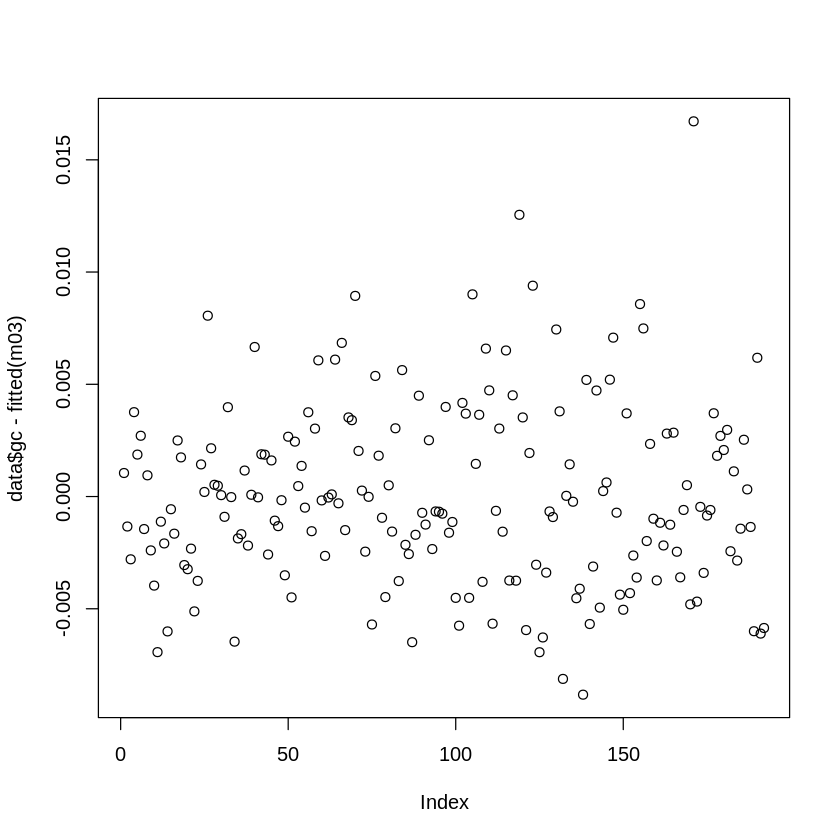

In [44]:
plot(data$gc-fitted(m03))

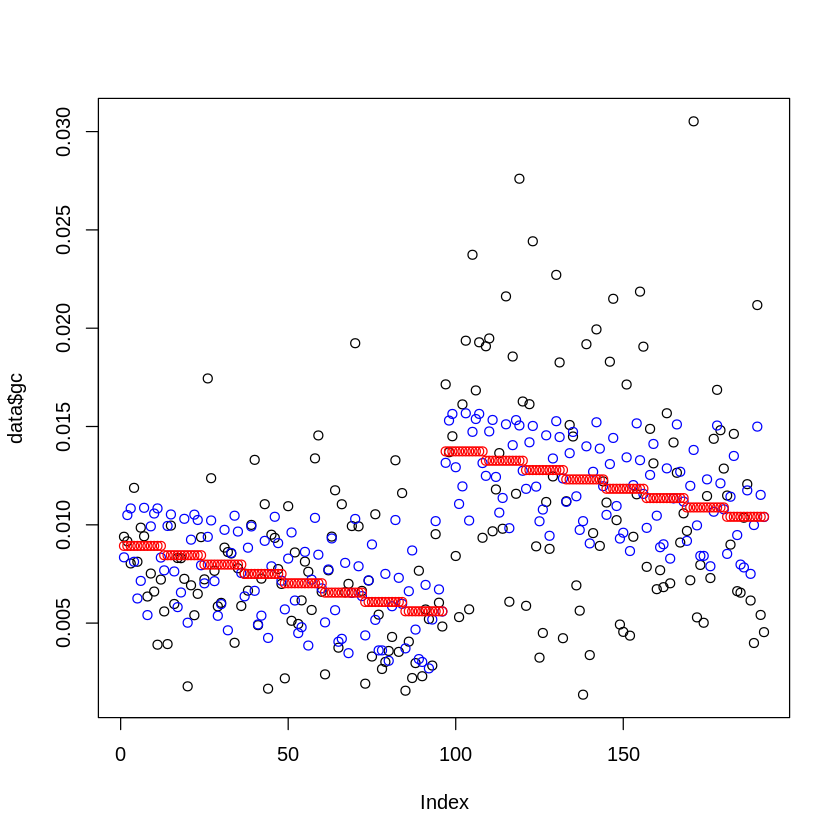

In [45]:
plot(data$gc,type='p',col='black')
lines(fitted(m03),type='p',col='blue')
lines(getME(m03,'X') %*% fixef(m03),type='p',col='red')

In [34]:
# ?
data$pair_pp1<-c(1,1,1,2,2,3,4,4,4,3,3,2)
data$pair_pp2<-c(2,3,4,3,4,4,3,2,1,3,2,1)

In [35]:
m00=lmer(gc ~ 1 + (1|pair_pp1) + (1|pair_pp2),data=data,REML=0)
m01=lmer(gc ~ 1 + trial + (1|pair_pp1) + (1|pair_pp2),data=data,REML=0)

In [36]:
m02=lmer(gc ~ 1 + trial + (1+trial|pair_pp1) + (1+trial|pair_pp2),data=data,REML=0)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”

In [37]:
m02=lmer(gc ~ 1 + trial + piece + (1|pair_pp1) + (1|pair_pp2),data=data,REML=0)
m03=lmer(gc ~ 1 + trial+condition + piece + (1|pair_pp1) + (1|pair_pp2),data=data,REML=0)
m04=lmer(gc ~ 1 + trial*condition + piece + (1|pair_pp1) + (1|pair_pp2),data=data,REML=0)
m05=lmer(gc ~ 1 + trial*condition*piece + (1|pair_pp1) + (1|pair_pp2),data=data,REML=0)

In [39]:
anova(m00,m01,m02,m03,m04,m05)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m00,4,-1454.916,-1441.886,731.4578,-1462.916,NA,NA,NA
m01,5,-1461.439,-1445.151,735.7193,-1471.439,8.5228860,1,3.507079e-03
m02,6,-1507.814,-1488.269,759.9072,-1519.814,48.3758053,1,3.518830e-12
m03,7,-1506.041,-1483.239,760.0207,-1520.041,0.2270973,1,6.336845e-01
m04,8,-1505.736,-1479.676,760.8681,-1521.736,1.6947516,1,1.929758e-01
m05,11,-1502.002,-1466.169,762.0008,-1524.002,2.2653970,3,5.191823e-01


In [40]:
summary(m02)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: gc ~ 1 + trial + piece + (1 | pair_pp1) + (1 | pair_pp2)
   Data: data

     AIC      BIC   logLik deviance df.resid 
 -1507.8  -1488.3    759.9  -1519.8      186 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4782 -0.6906 -0.0834  0.5852  4.3405 

Random effects:
 Groups   Name        Variance  Std.Dev.
 pair_pp1 (Intercept) 1.927e-06 0.001388
 pair_pp2 (Intercept) 1.927e-06 0.001388
 Residual             2.004e-05 0.004476
Number of obs: 192, groups:  pair_pp1, 4; pair_pp2, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)  0.0093600  0.0012571   7.446
trial       -0.0004752  0.0001410  -3.371
piece2       0.0048071  0.0006461   7.441

Correlation of Fixed Effects:
       (Intr) trial 
trial  -0.505       
piece2 -0.257  0.000